# DataArray - Dfs123 plotting

A DataArray with gridded data, can be plotted in many different ways.

In [1]:
import mikeio


## Dfs1

In [2]:
ds = mikeio.read("../tests/testdata/vu_tide_hourly.dfs1")
ds = ds.rename({"Tidal current component (geographic East)":"Tidal current u-comp"})
da = ds["Tidal current u-comp"]
da

<mikeio.DataArray>
Name: Tidal current u-comp
Dimensions: (time:721, x:11)
Time: 2021-08-01 00:00:00 - 2021-08-31 00:00:00 (721 records)

In [3]:
da.geometry

<mikeio.Grid1D>
axis: nx=11 points from x0=0 to x1=0.981768 with dx=0.0981768

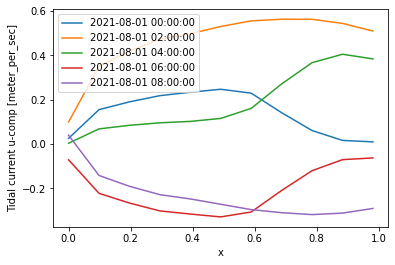

In [4]:
steps = slice(0,10,2)
ax=da[steps].plot()
ax.legend(da[steps].time);

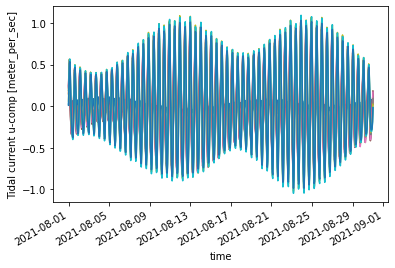

In [5]:
# plot all points on line as time series
da.plot.timeseries();

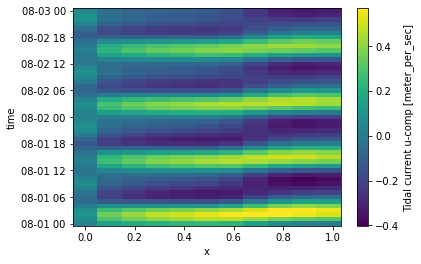

In [6]:
# first 48 hours...  
da[:49].plot.pcolormesh();

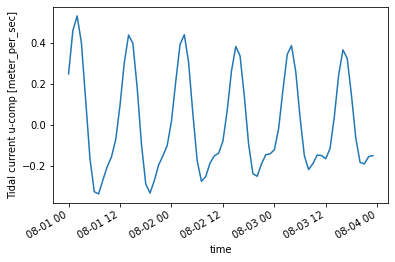

In [7]:
da.sel(x=0.5).sel(time=slice("2021-08-01","2021-08-03")).plot();

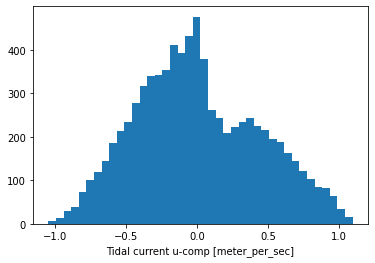

In [8]:
da.plot.hist(bins=40);

## Dfs2

In [9]:
da = mikeio.read("../tests/testdata/gebco_sound.dfs2")[0]
da

<mikeio.DataArray>
Name: Elevation
Dimensions: (time:1, y:264, x:216)
Time: 2020-05-15 11:04:52 (time-invariant)

In [10]:
da.geometry

<mikeio.Grid2D>
x-axis: nx=216 points from x0=12.2021 to x1=13.0979 with dx=0.00416667
y-axis: ny=264 points from y0=55.2021 to y1=56.2979 with dy=0.00416667
Number of grid points: 57024

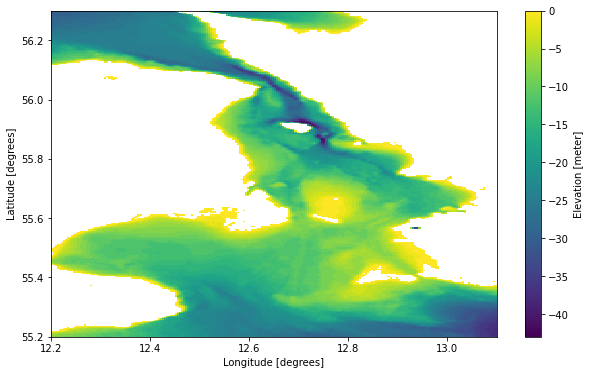

In [11]:
da.plot(figsize=(10,6));

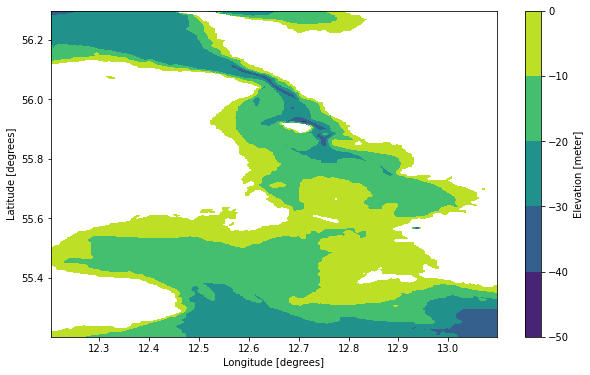

In [12]:
da.plot.contourf(figsize=(10,6), levels=4);

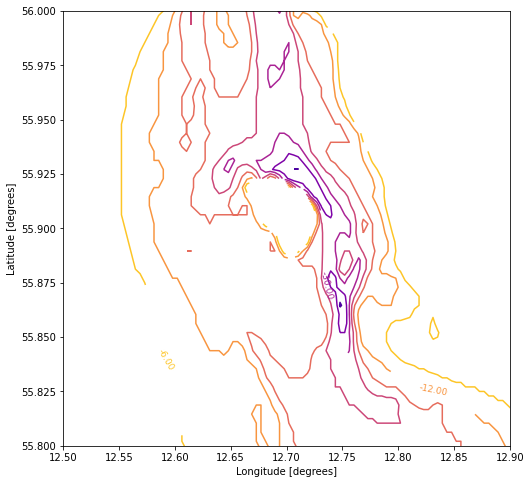

In [13]:
ax = da.plot.contour(figsize=(8,8), cmap="plasma")
ax.set_xlim([12.5, 12.9]);
ax.set_ylim([55.8, 56]);

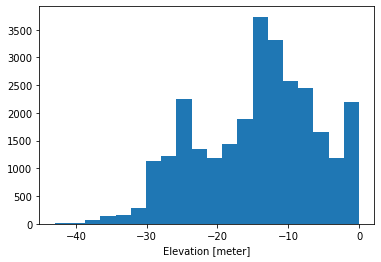

In [14]:
da.plot.hist(bins=20);